In [8]:
import numpy as np
import matplotlib.pyplot as plt

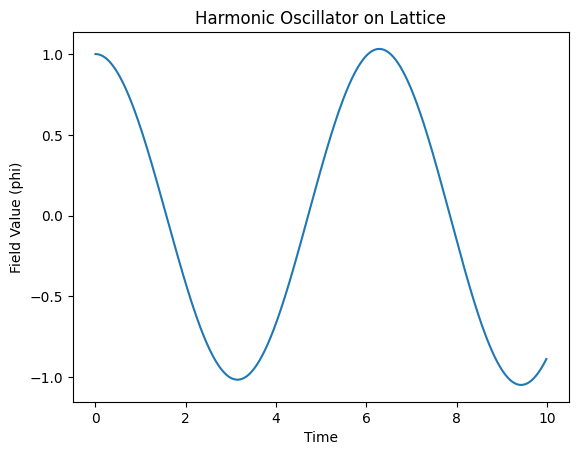

In [9]:
# Parameters
m = 1.0  # Mass
omega = m  # Angular frequency
dt = 0.01  # Time step
n_steps = 1000  # Number of time steps

# Initialize position and velocity
phi = 1.0  # Initial position
phi_dot = 0.0  # Initial velocity

# Lists to store results
time = np.arange(0, n_steps * dt, dt)
phi_vals = []

# Time evolution (Leapfrog method)
for t in time:
    phi_vals.append(phi)
    phi_ddot = -omega**2 * phi  # Acceleration (Hooke's law)
    phi += phi_dot * dt  # Update position
    phi_dot += phi_ddot * dt  # Update velocity

# Plot the results
plt.plot(time, phi_vals)
plt.title("Harmonic Oscillator on Lattice")
plt.xlabel("Time")
plt.ylabel("Field Value (phi)")
plt.show()


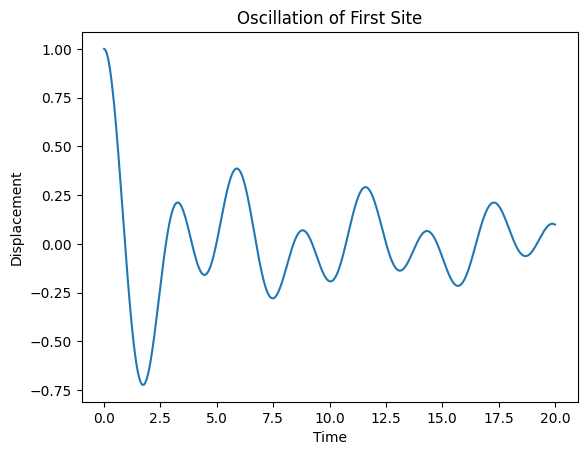

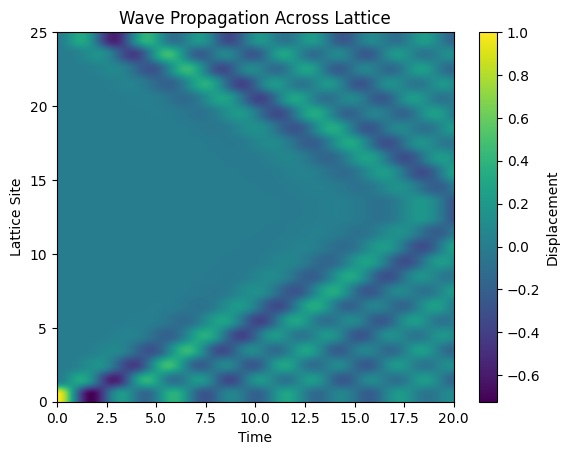

In [88]:
# Parameters
N = 25 # Number of oscillators
m = 1.0  # Mass
k = 1.0  # Coupling constant (spring constant)
dt = 0.01  # Time step
n_steps = 2000  # Number of time steps

# Initialize positions and velocities
#phi = np.sin(np.linspace(0, 1 * np.pi, N))  # Initial positions (wave-like)
phi = np.zeros(N)
#phi = np.ones(N)
phi[0] = 1.0  # First site displaced
phi_dot = np.zeros(N)  # Initial velocities

# Matrix for coupling
laplacian = -2 * np.eye(N) + np.eye(N, k=1) + np.eye(N, k=-1)
laplacian[0, -1] = laplacian[-1, 0] = 1  # Periodic boundary conditions

# Time evolution
phi_vals = [phi.copy()]
time = np.arange(0, n_steps * dt, dt)

for _ in time:
    accel = -m**2 * phi + k * np.dot(laplacian, phi)  # Acceleration
    phi_dot += accel * dt  # Update velocity
    phi += phi_dot * dt  # Update position
    phi_vals.append(phi.copy())

# Convert results to an array for easier plotting
phi_vals = np.array(phi_vals)

# Plot the evolution of the first oscillator
plt.plot(np.linspace(0, dt * n_steps, n_steps + 1), phi_vals[:, 0])
plt.title("Oscillation of First Site")
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

# Visualize the wave propagation
plt.imshow(phi_vals.T, aspect='auto', extent=[0, dt * n_steps, 0, N],origin="lower")
plt.colorbar(label="Displacement")
plt.title("Wave Propagation Across Lattice")
plt.xlabel("Time")
plt.ylabel("Lattice Site")
plt.show()


In [176]:
def hamiltonian(N, m, k):
    # Coupling matrix
    if k == 0:
        coupling = np.zeros((N, N))
    else:
        coupling = -2 * np.eye(N) + np.eye(N, k=1) + np.eye(N, k=-1)
        coupling[0, -1] = coupling[-1, 0] = 1  # Periodic boundary conditions

    # Hamiltonian matrix
    H_phi = (m**2*np.eye(N)) + (k * coupling) + (0.5 * np.eye(N))
    H_pi = np.eye(N)  # Kinetic term

    H_total = H_phi + H_pi

    return H_total


In [177]:
H = hamiltonian(N, m, k)
H

array([[2.5, 0. , 0. ],
       [0. , 2.5, 0. ],
       [0. , 0. , 2.5]])

In [178]:
np.linalg.eigh(H)

EighResult(eigenvalues=array([2.5, 2.5, 2.5]), eigenvectors=array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]))

Energy Levels (Eigenvalues): [1.  1.  1.  1.5 1.5 1.5]
Ground State Energy: 1.0


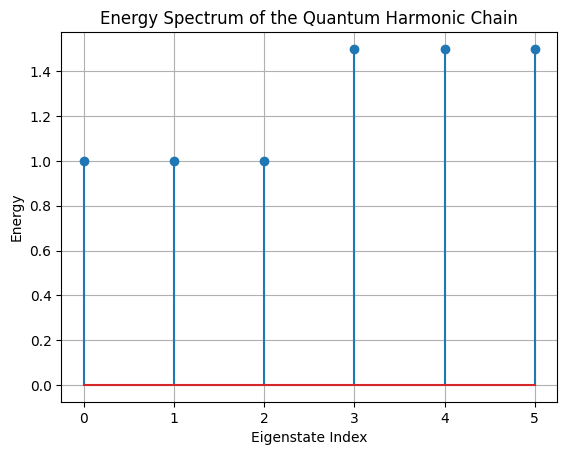

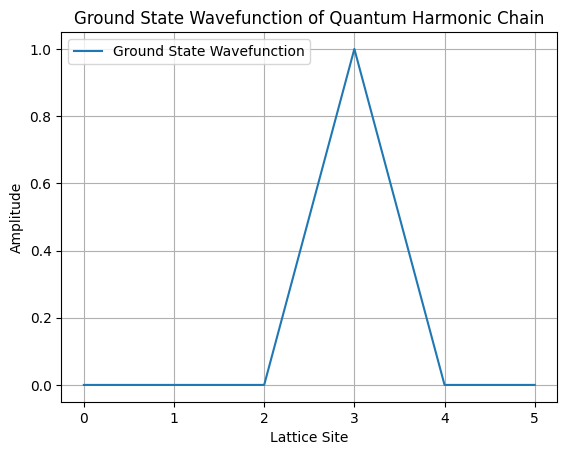

In [164]:
# Parameters
N = 3  # Number of lattice sites
m = 1.0  # Mass term
k = 0  # Coupling constant

# Step 1: Construct the Hamiltonian
H_phi, H_pi = hamiltonian(N, m, k)

# Step 2: Diagonalize the Hamiltonian
H = np.block([[H_phi, np.zeros_like(H_phi)], [np.zeros_like(H_pi), H_pi]])

eigvals, eigvecs = np.linalg.eigh(H)

# Step 3: Analyze Results
print("Energy Levels (Eigenvalues):", eigvals)

# Ground State Energy
E_0 = eigvals[0]
print("Ground State Energy:", E_0)

# Plot the eigenvalues (energy spectrum)
plt.stem(eigvals)#, use_line_collection=True)
plt.title("Energy Spectrum of the Quantum Harmonic Chain")
plt.xlabel("Eigenstate Index")
plt.ylabel("Energy")
plt.grid()
plt.show()

# Visualize the ground state wavefunction
ground_state = eigvecs[:, 0]
plt.plot(ground_state, label="Ground State Wavefunction")
plt.title("Ground State Wavefunction of Quantum Harmonic Chain")
plt.xlabel("Lattice Site")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [122]:
wavefunction = eigvecs[:, 0]  # Ground state
normalized_wavefunction = wavefunction / np.linalg.norm(wavefunction)

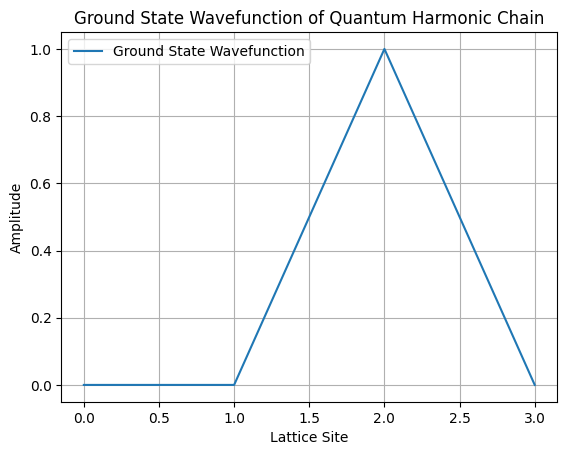

In [123]:
plt.plot(normalized_wavefunction, label="Ground State Wavefunction")
plt.title("Ground State Wavefunction of Quantum Harmonic Chain")
plt.xlabel("Lattice Site")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()